In [1]:
import numpy as np
import torch
import pandas as pd
import odbo
import os
import matplotlib.pyplot as plt

## Comparison with different choices of Bayesian Optimization methods

In [7]:
# GB1_2016, miss BO_GP and TuRBO_GP
ODBO_GP_bacth1_Y, ODTuRBO_GP_bacth1_Y, ODBO_RobustGP_bacth1_Y, ODTuRBO_RobustGP_bacth1_Y = [], [], [], []
for i in range(10):
    ODBO_GP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_ODBO_BO_GP_batch1_{}.npy'.format(i)))
    ODTuRBO_GP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_ODBO_TuRBO_GP_batch1_{}.npy'.format(i)))
    ODBO_RobustGP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_ODBO_BO_RobustGP_batch1_{}.npy'.format(i)))
    ODTuRBO_RobustGP_bacth1_Y.append(np.load('results/GB1_2016/GB1_2016_ODBO_TuRBO_RobustGP_batch1_{}.npy'.format(i)))
ODBO_GP_bacth1_Y, ODTuRBO_GP_bacth1_Y, ODBO_RobustGP_bacth1_Y, ODTuRBO_RobustGP_bacth1_Y = np.hstack(ODBO_GP_bacth1_Y), np.hstack(ODTuRBO_GP_bacth1_Y), np.hstack(ODBO_RobustGP_bacth1_Y), np.hstack(ODTuRBO_RobustGP_bacth1_Y)

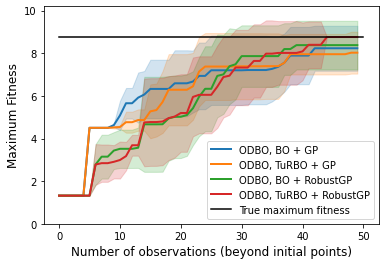

In [18]:
# Plotting results
fig = plt.figure()
odbo.plot.plot_bo(iters=50, BO_result=ODBO_GP_bacth1_Y, method='ODBO, BO + GP', color = 'C0')
odbo.plot.plot_bo(iters=50, BO_result=ODTuRBO_GP_bacth1_Y, method='ODBO, TuRBO + GP', color = 'C1')
odbo.plot.plot_bo(iters=50, BO_result=ODBO_RobustGP_bacth1_Y, method='ODBO, BO + RobustGP', color = 'C2')
odbo.plot.plot_bo(iters=50, BO_result=ODTuRBO_RobustGP_bacth1_Y, method='ODBO, TuRBO + RobustGP', color = 'C3')
plt.plot([0,50], [max(Y_test), max(Y_test)], label='True maximum fitness', color = 'k')
plt.xlabel('Number of observations (beyond initial points)', fontsize=12)
plt.legend()
plt.ylim([0, 10.2])
plt.ylabel('Maximum Fitness', fontsize=12)
plt.show()